# Importing data activity

## Vocabulary
- **Folder / directory**: a container for files.
- **Path**: directions to a file (example: `data_from_client/banknote.csv`).
- **Working directory**: the folder R uses as “here” when you write a relative path.
- **Relative path**: a path that starts from the working directory.
- **Absolute path**: a full path starting from the root of the computer (we avoid these for class projects).

### Checkpoint
1. We will be setting relative paths.
2. In the JupyterLab file browser (left panel), find that same folder.
    (If you're in Notebook, you can switch by clicking on button in the upper right). 

**Note**: You are starting at `activity.ipynb`.

## Part 1 — Explore the data folder
Your project folder `lec8/` contains a folders and files like:

```
demo/
  activity.ipynb
  data_from_client/
    data/
      baby (1).csv
    my_data_for_YOU/
      data/
        actors.csv
    banknote.csv
DATA/
  united_summer2015.csv 
```

## Load tidyverse libraries

In [2]:
# Read in readr to read the csv's with read_csv
library(readr)

# Library for plotting
library(ggplot2)

### Task 1
Read `baby (1).csv` by finding the relative path.
- Store it as a variable named `baby`
- Print the first 6 rows

In [3]:
baby <- read_csv('data_from_client/data/baby (1).csv')
head(baby)

Rows: 1174 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (5): Birth Weight, Gestational Days, Maternal Age, Maternal Height, Mate...
lgl (1): Maternal Smoker

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
120,284,27,62,100,FALSE
113,282,33,64,135,FALSE
128,279,28,64,115,TRUE
108,282,23,67,125,TRUE
136,286,25,62,93,FALSE
138,244,33,62,178,FALSE


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


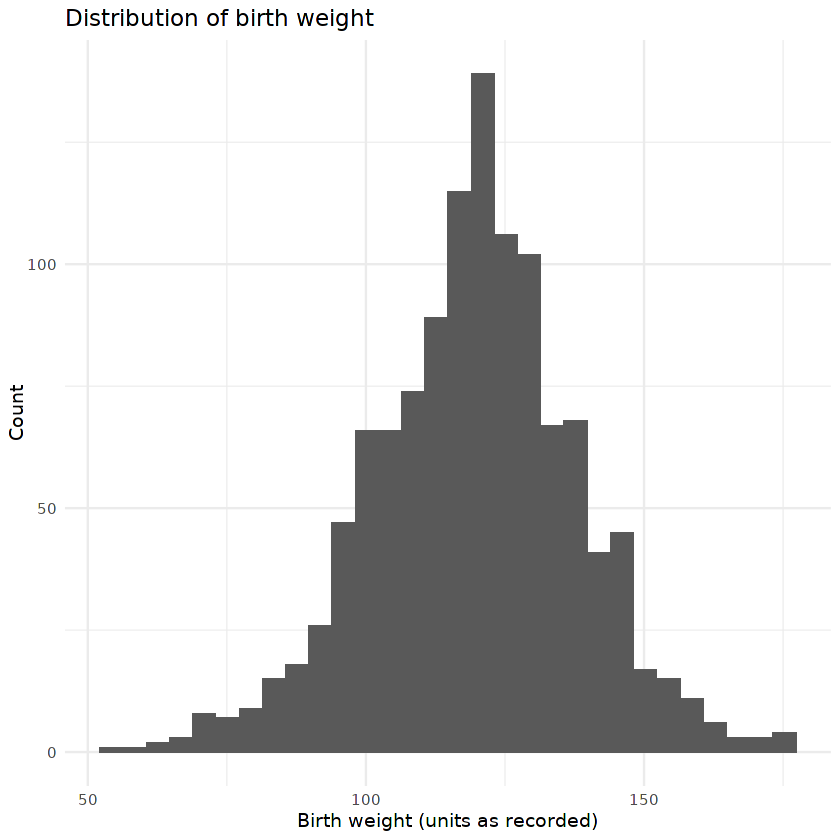

In [4]:
ggplot(baby, aes(x = `Birth Weight`)) +
  geom_histogram() +
  labs(
    title = "Distribution of birth weight",
    x = "Birth weight (units as recorded)",
    y = "Count"
  ) +
  theme_minimal()

### Task 2
Read `actors.csv` by finding the relative path.
- Store it as a variable named `actors`
- Print the column names

In [ ]:
actors <- read_csv('...')
names(actors)

In [ ]:
ggplot(actors, aes(x = `Number of Movies`, y = `Total Gross`)) +
  geom_point() +
  labs(
    title = "Total gross vs number of movies",
    x = "Number of movies",
    y = "Total gross (millions)"
  ) +
  theme_minimal()

### Task 3

Read `united_summer2015.csv` by finding the relative path.
Hint: To go outside your directory, use `../`.

- Store it as a variable named `u`

In [5]:
u <- read_csv("../DATA/united_summer2015.csv")

Rows: 13825 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Date, Destination
dbl (2): Flight Number, Delay

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




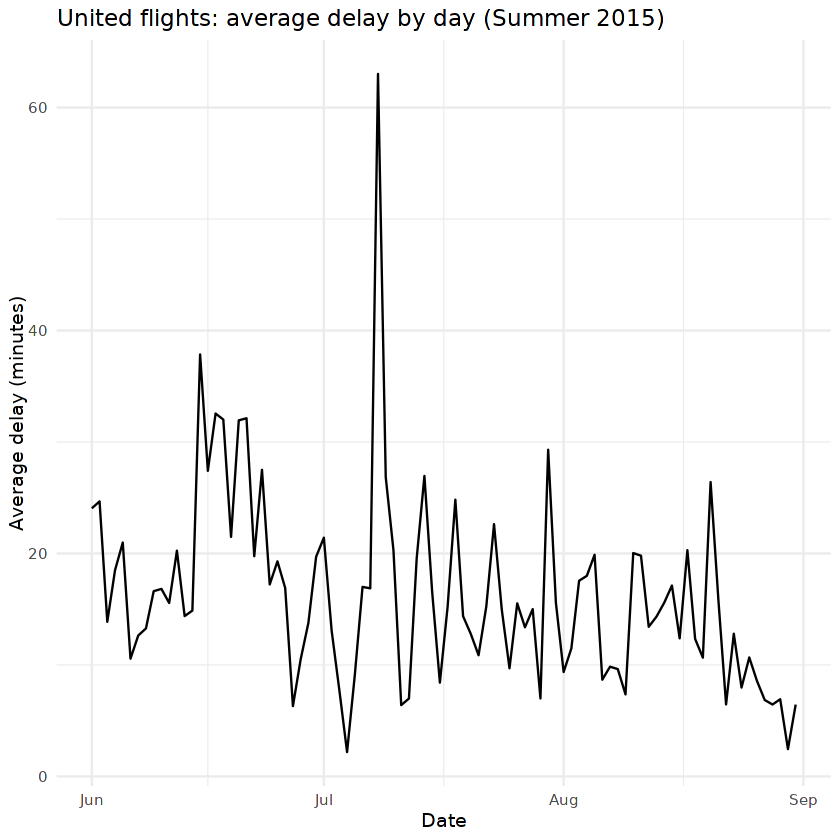

In [6]:
library(dplyr) # for mutate to change the dates and group_by & summarize 
library(lubridate) # to encode the dates

u_daily <- u |>
  mutate(Date = mdy(Date)) |>
  group_by(Date) |>
  summarize(mean_delay = mean(Delay))

ggplot(u_daily, aes(x = Date, y = mean_delay)) +
  geom_line() +
  labs(
    title = "United flights: average delay by day (Summer 2015)",
    x = "Date",
    y = "Average delay (minutes)"
  ) +
  theme_minimal()